# 1st Question

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
df = pd.read_csv("insurance.csv")

y1 = df['CARAVAN']
x1 = df.drop(['CARAVAN'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.2 , random_state = 1)

In [2]:
df['CARAVAN'].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [3]:
cls = LogisticRegression(solver='liblinear')
cls.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [4]:
x = cls.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test,x[:,1], pos_label=1)
preds = x[:,1]
p_fpr, p_tpr, _ = roc_curve(y_test, preds, pos_label=1)

Area Under Curve is 0.7084681539509536


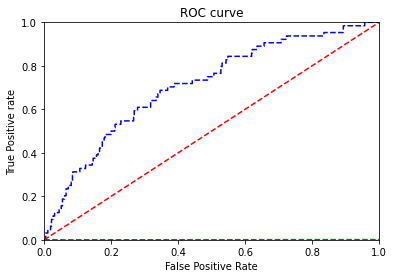

In [5]:
plt.plot(fpr,linestyle='--',color='green')
plt.plot(p_fpr,p_tpr,linestyle='--', color='blue')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
auc = roc_auc_score(y_test, x[:,1])
print("Area Under Curve is",auc)

# 4th Question

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline


df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names =["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])

#label_encoder = preprocessing.LabelEncoder()
#df['Class'] = label_encoder.fit_transform(df['Class'])
#df['Class'].unique()

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2 , random_state = 1)

In [8]:
ks_set = [1,2,3,5,10,15,20,25,30,35,40]
scores = []
for i in ks_set:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    #print(classification_report(y_test, y_pred))
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores

[1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

[0.040000000000000036, 0.053333333333333455, 0.033333333333333215, 0.026666666666666616, 0.019999999999999907, 0.033333333333333215, 0.040000000000000036, 0.040000000000000036, 0.060000000000000164, 0.046666666666666634, 0.07333333333333325]
Minimum error: 0.019999999999999907 at K = 4


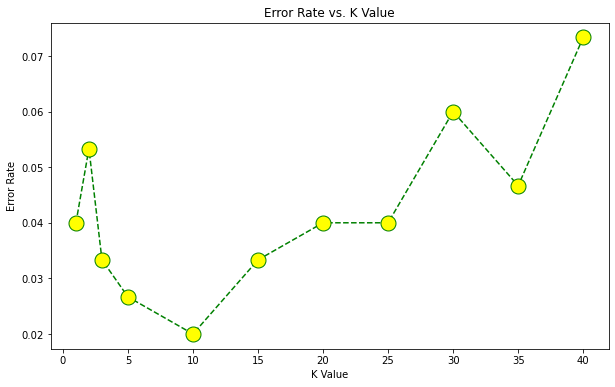

In [9]:
#K-fold cross validation and Best Case K value
k_scores=[]
for k in ks_set:
    knn_classifier1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier1, x, y, cv=5, scoring='accuracy')
    k_scores.append(1-(scores.mean()))
print(k_scores)
plt.figure(figsize=(10,6))
plt.plot(ks_set,k_scores,color='green', linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
print("Minimum error:",min(k_scores),"at K =",k_scores.index(min(k_scores)))